<a href="https://colab.research.google.com/github/Mhkkks/ASR-Bias-Computational-Analysis/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup and Data Download

In [35]:
# 1. Install the gdown library
!pip install gdown

# 2. Download the .zip file from Google Drive
file_id = "10qPLWC5XLv59TzerJtgJ4MliGnHj-WB2" # Your file ID
zip_file_path = "MonoTED.zip"

!gdown --id {file_id} -O {zip_file_path}

print("Download complete!")

# 3. Unzip the file
import zipfile
import os

# This is the name of the folder *inside* your zip file
data_directory = "MonoTED"

print("\nStep 3: Unzipping the files...")
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall() # This creates the 'MonoTED' folder

print("Unzipping complete! Your data is now ready.")

# 4. Check the unzipped files
print(f"\nFiles in your '{data_directory}' directory:")
try:
    print(os.listdir(data_directory))

    # Also check the 'transcripts' sub-folder
    transcript_dir = os.path.join(data_directory, "transcripts")
    print(f"\nFiles in '{transcript_dir}' (first 5):")
    print(os.listdir(transcript_dir)[:5])

except FileNotFoundError:
    print(f"Error: Directory '{data_directory}' was not found.")
    print("Please check the name of the top-level folder in your .zip file.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10qPLWC5XLv59TzerJtgJ4MliGnHj-WB2
To: /content/MonoTED.zip
100% 4.31M/4.31M [00:00<00:00, 113MB/s]
Download complete!

Step 3: Unzipping the files...
Unzipping complete! Your data is now ready.

Files in your 'MonoTED' directory:
['names_and_labels.csv', 'transcripts', 'README.txt']

Files in 'MonoTED/transcripts' (first 5):
['AstroTeller_2016.txt', 'TakaharuTezuka_2014X.txt', 'CarolinePaul_2016W.txt', 'DavidBlaine_2009P.txt', 'RoryStewart_2012X.txt']


Load and Inspect the Metadata

In [36]:
import pandas as pd
import os

# --- Part 1: Load the CSV (This defines 'df') ---

# Set the base directory name
data_directory = "MonoTED"
# Set the path to the CSV file
metadata_file_path = os.path.join(data_directory, 'names_and_labels.csv')

print(f"Loading data from: {metadata_file_path}")
try:
    # Load the DataFrame
    df = pd.read_csv(metadata_file_path)
    print("Success! 'names_and_labels.csv' loaded.")
except FileNotFoundError:
    print(f"--- ERROR: File not found at {metadata_file_path} ---")
    print("Please make sure the 'MonoTED' folder is in your main directory.")
    df = None # Set df to None so the script stops
except Exception as e:
    print(f"An error occurred loading the CSV: {e}")
    df = None

# --- Part 2: Load Transcripts (Now 'df' exists) ---

if df is not None:
    # Set the column name that has the filenames
    filename_column = 'File'

    # Define the function to read each text file
    def load_transcript(base_filename):
        # Build the full path: MonoTED/transcripts/filename.txt
        file_path = os.path.join(data_directory, "transcripts", base_filename + ".txt")
        try:
            with open(file_path, 'r') as f:
                return f.read()
        except FileNotFoundError:
            print(f"Warning: File not found {file_path}")
            return None
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            return None

    # Apply the function to create the new 'transcript' column
    print("\nLoading all transcripts into the DataFrame. This may take a moment...")
    df['transcript'] = df[filename_column].apply(load_transcript)
    print("Done.")

    # --- Part 3: Check the final DataFrame ---
    print("\n--- DataFrame with new 'transcript' column ---")
    df.info() # Shows all columns, including the new 'transcript' one

    print("\n--- First 5 rows (scroll right to see 'transcript') ---")
    print(df.head())

Loading data from: MonoTED/names_and_labels.csv
Success! 'names_and_labels.csv' loaded.

Loading all transcripts into the DataFrame. This may take a moment...
Done.

--- DataFrame with new 'transcript' column ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         846 non-null    object 
 1   File         846 non-null    object 
 2   Age          607 non-null    float64
 3   Gender       846 non-null    object 
 4   Race         846 non-null    object 
 5   Language     846 non-null    object 
 6   Words        846 non-null    int64  
 7   Seconds      846 non-null    int64  
 8   WPS          846 non-null    float64
 9   Readability  846 non-null    float64
 10  F0mean       846 non-null    float64
 11  F0median     846 non-null    float64
 12  transcript   846 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage

In [37]:
import pandas as pd

# This is the direct URL to the data file containing the Word Error Rate (WER) for each platform.
url = "https://raw.githubusercontent.com/NEU-SNS/MonoTED/master/wer.csv"

print(f"Loading platform performance data from:\n{url}\n")

try:
    # Load the platform results into a new DataFrame
    wer_df = pd.read_csv(url)

    print("Success! Platform performance DataFrame ('wer_df') loaded correctly.")
    print("--------------------------------------")
    print("First 5 Rows:")
    print(wer_df.head())

except Exception as e:
    print(f"An error occurred: {e}")
    print("Could not download the platform data. Please check your internet connection.")

Loading platform performance data from:
https://raw.githubusercontent.com/NEU-SNS/MonoTED/master/wer.csv

Success! Platform performance DataFrame ('wer_df') loaded correctly.
--------------------------------------
First 5 Rows:
               Name                   File   Age Gender   Race Language  \
0        Aaron Huey        AaronHuey_2010X  35.0      M  White       US   
1      Abha Dawesar      AbhaDawesar_2013G  39.0      F  Asian       L2   
2     Abigail Marsh     AbigailMarsh_2016T  40.0      F  White       US   
3  Abraham Verghese  AbrahamVerghese_2011G  56.0      M  Asian       L2   
4  Achenyo Idachaba  AchenyoIdachaba_2015W  45.0      F  Black       L2   

   Words  Seconds    WPS  Readability  F0mean  F0median   YT_WER   FB_WER  \
0   2200      925  2.380         7.35  158.14    139.13  0.03920  0.06062   
1   1987      722  2.753         6.98  240.70    242.42  0.01510  0.03926   
2   2042      746  2.737         6.97  215.87    219.18  0.02941  0.04412   
3   3069     

## EDA

Attributes

In [38]:
# Get summary statistics for all numerical columns
df.describe()

,Age,Words,Seconds,WPS,Readability,F0mean,F0median
count,607.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,48.344316,2090.587470,821.456265,2.536985,6.947234,182.444019,169.101501
std,13.915056,810.424458,287.806629,0.363861,0.593373,30.383522,38.277157
min,13.000000,315.000000,136.000000,1.544000,5.670000,122.620000,89.890000
25%,38.000000,1527.500000,640.250000,2.291500,6.540000,159.315000,139.130000
50%,47.000000,2129.000000,857.500000,2.542000,6.890000,176.575000,160.000000
75%,57.000000,2659.750000,1032.000000,2.775000,7.310000,205.262500,200.000000
max,104.000000,4546.000000,1917.000000,3.750000,9.020000,282.930000,290.910000


In [39]:
# Get summary statistics for all object/categorical columns
df.describe(include=['object']).T

,count,unique,top,freq
Name,846,846,Zubaida Bai,1
File,846,846,ZubaidaBai_2016S,1
Gender,846,2,M,548
Race,846,4,White,651
Language,846,3,US,478
transcript,846,846,In the next six minutes that you will listen t...,1


In [40]:
try:
    # --- Distribution by gender and language ---
    print("\n🧍 Gender Distribution:")
    print(df['Gender'].value_counts())

    print("\n🌍 Language Distribution:")
    print(df['Language'].value_counts())

except NameError:
    print("--- ERROR ---")
    print("NameError: 'df' is not defined.")
    print("Please re-run the code block that loads 'names_and_labels.csv' first.")


🧍 Gender Distribution:
Gender
M    548
F    298
Name: count, dtype: int64

🌍 Language Distribution:
Language
US        478
Non-US    216
L2        152
Name: count, dtype: int64


In [41]:
import os

# --- 1. Define a function to get *only* the length ---
data_directory = "MonoTED"
filename_column = 'File' # The column from your df with the filename

def get_text_length(base_filename):
    """Reads a transcript file and returns its word count."""

    # Build the full path: MonoTED/transcripts/filename.txt
    file_path = os.path.join(data_directory, "transcripts", base_filename + ".txt")

    try:
        with open(file_path, 'r') as f:
            content = f.read()
            return len(content.split()) # Return the word count
    except FileNotFoundError:
        #print(f"Warning: File not found {file_path}")
        return 0 # Return 0 for missing files
    except Exception as e:
        #print(f"Error reading {file_path}: {e}")
        return 0 # Return 0 for other errors

try:
    # --- 2. Create the new 'text_length' column ---
    # This applies the function to every row in the 'File' column
    print("\nCalculating text length for each file...")
    df['text_length'] = df[filename_column].apply(get_text_length)
    print("Done.")

    # --- 3. Run the 'text_length' analysis ---
    print("\n📊 Transcript Length Stats:")
    print(df['text_length'].describe())


except NameError:
    print(f"--- ERROR ---")
    print("NameError: 'df' is not defined.")
    print("Please re-run the code block that loads 'names_and_labels.csv' first.")
except KeyError:
    print(f"--- ERROR ---")
    print(f"KeyError: Could not find column '{filename_column}'.")
    print("Please check the 'filename_column' variable matches your DataFrame.")


Calculating text length for each file...
Done.

📊 Transcript Length Stats:
count     846.000000
mean     2108.881797
std       818.821694
min       316.000000
25%      1537.750000
50%      2146.500000
75%      2686.750000
max      4607.000000
Name: text_length, dtype: float64


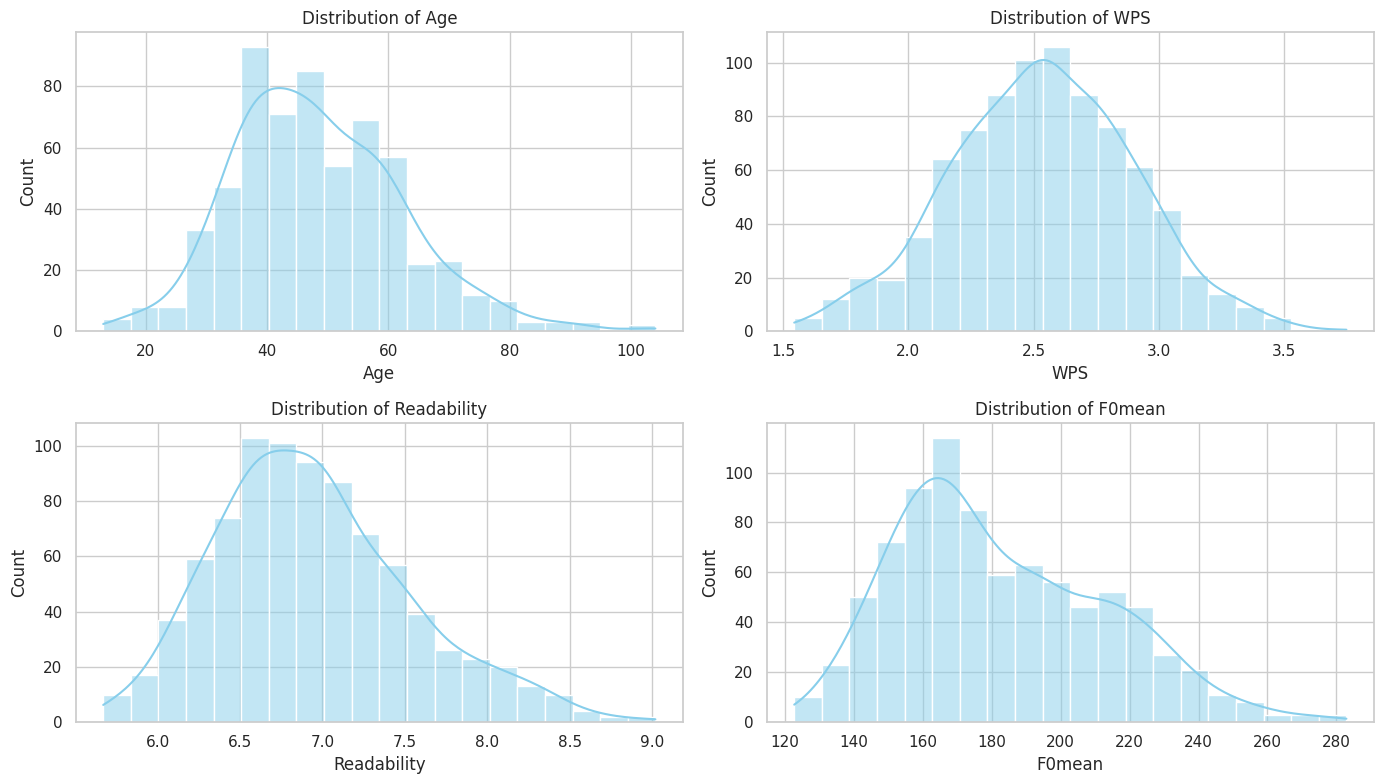

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 8))

# List of numerical features you want to plot
features = ['Age', 'WPS', 'Readability', 'F0mean']

# Loop through the features and create a subplot for each
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i) # Create a 2x2 grid, placing plots at position 'i'

    # --- This is the edited line ---
    # Plot a histogram with a KDE curve, using your 'df' DataFrame
    sns.histplot(df[col], kde=True, bins=20, color="skyblue")

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

# Adjust layout to prevent plots from overlapping
plt.tight_layout()
plt.show() # Display the plots

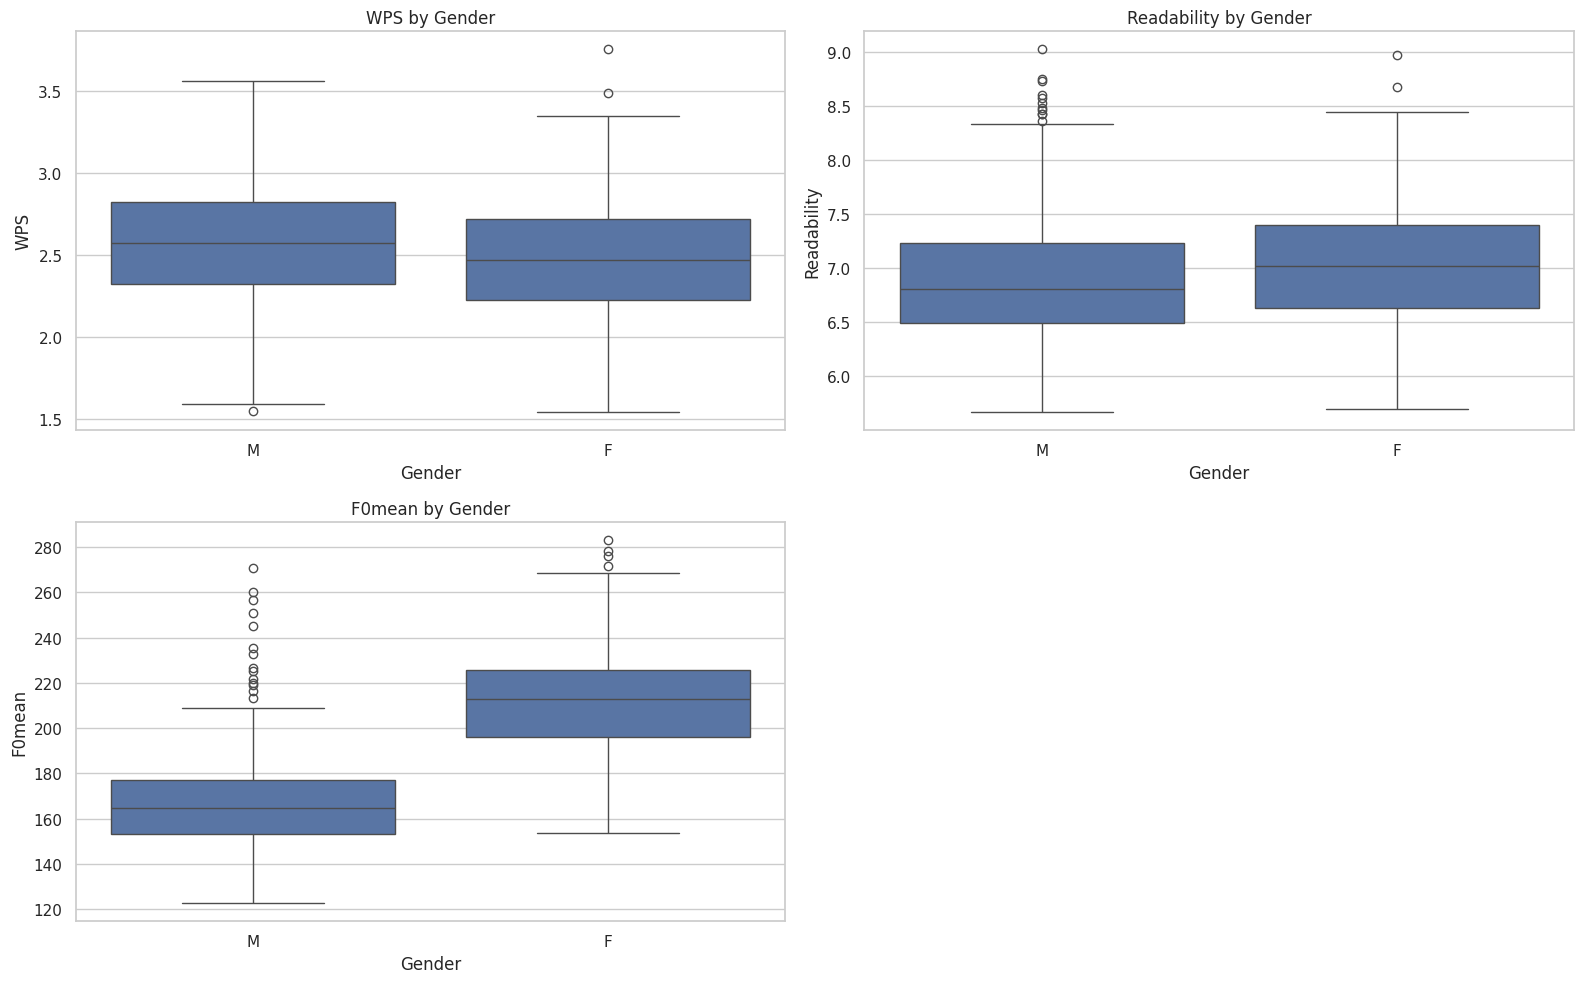

In [56]:

plt.figure(figsize=(16, 10))

# Loop through your features
for i, col in enumerate(['WPS', 'Readability', 'F0mean'], 1):
    plt.subplot(2, 2, i)

    sns.boxplot(x='Gender', y=col, data=df)

    plt.title(f"{col} by Gender")

plt.tight_layout()
plt.show()

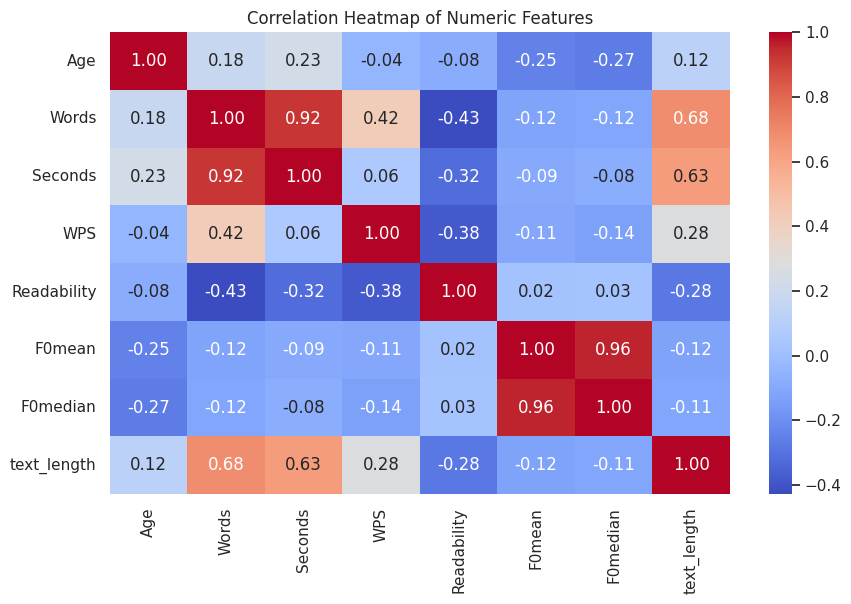

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

--- Starting Comprehensive Outlier Analysis for 8 Numerical Columns ---


/tmp/ipython-input-3929409262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


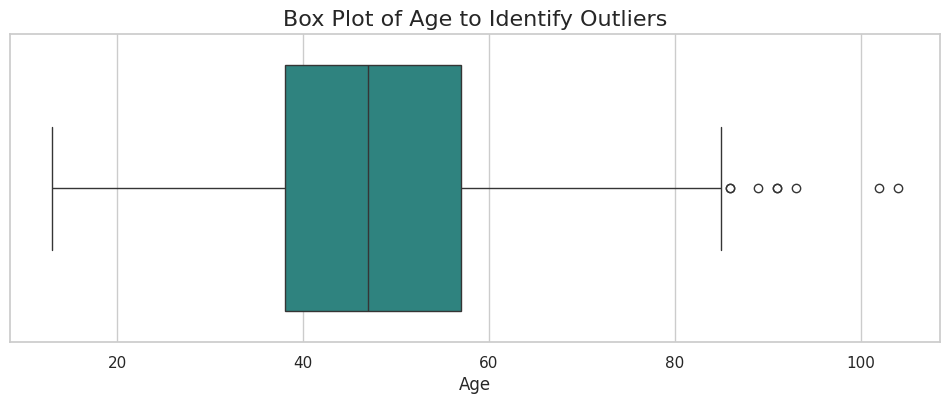


Outlier Detection Report for 'Age'
-----------------------------------
The Interquartile Range (IQR) is: 19.00
Lower Bound (Outlier Threshold): 9.50
Upper Bound (Outlier Threshold): 85.50

Found 8 outliers in the 'Age' column:
                  Name    Age
616     Paul Rothemund  104.0
164        Clint Smith  102.0
409    Jonathan Harris   93.0
403        John Wooden   91.0
386       Jimmy Carter   91.0
245      Elaine Morgan   89.0
89   Benoit Mandelbrot   86.0
129      Carolyn Jones   86.0




/tmp/ipython-input-3929409262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


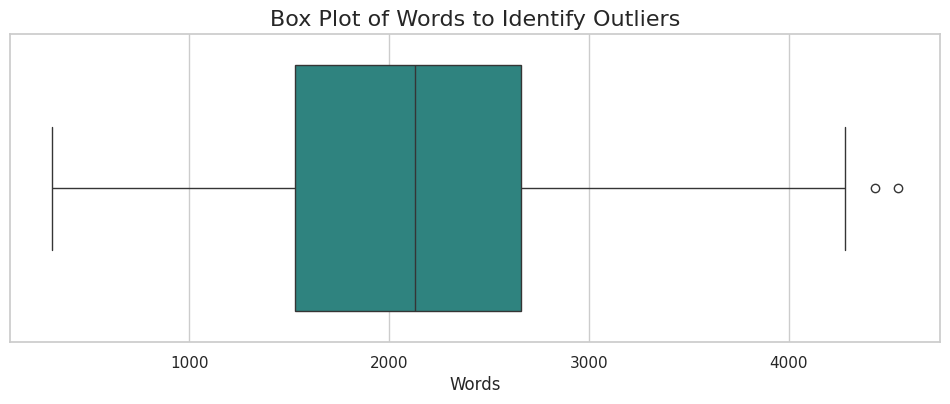


Outlier Detection Report for 'Words'
-------------------------------------
The Interquartile Range (IQR) is: 1132.25
Lower Bound (Outlier Threshold): -170.88
Upper Bound (Outlier Threshold): 4358.12

Found 2 outliers in the 'Words' column:
                         Name  Words
147  Chimamanda Ngozi Adichie   4546
468             Laurie Santos   4434




/tmp/ipython-input-3929409262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


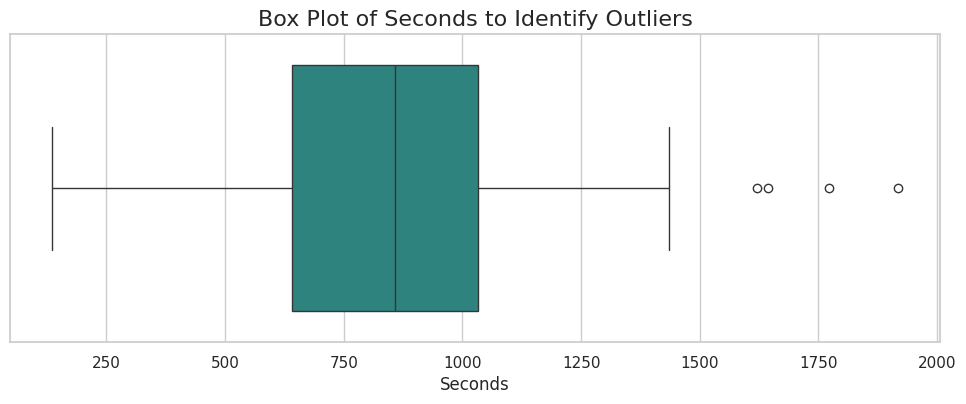


Outlier Detection Report for 'Seconds'
---------------------------------------
The Interquartile Range (IQR) is: 391.75
Lower Bound (Outlier Threshold): 52.62
Upper Bound (Outlier Threshold): 1619.62

Found 4 outliers in the 'Seconds' column:
                         Name  Seconds
588             Norman Foster     1917
147  Chimamanda Ngozi Adichie     1772
359              Jane Goodall     1644
33               Amory Lovins     1621




/tmp/ipython-input-3929409262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


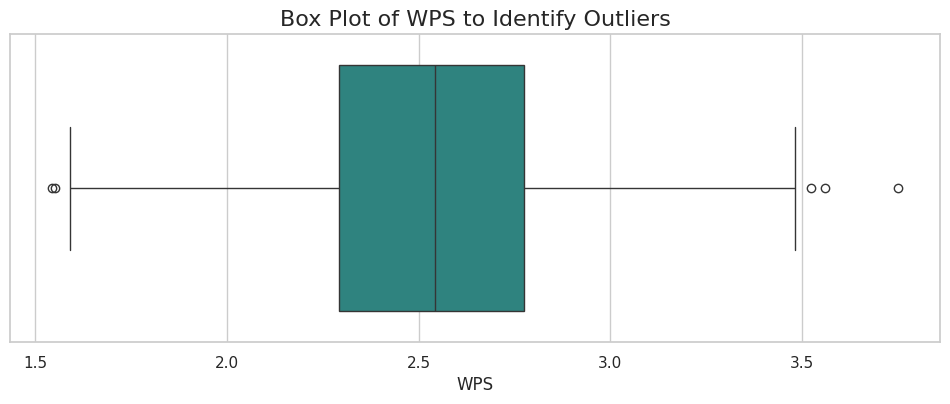


Outlier Detection Report for 'WPS'
-----------------------------------
The Interquartile Range (IQR) is: 0.48
Lower Bound (Outlier Threshold): 1.57
Upper Bound (Outlier Threshold): 3.50

Found 5 outliers in the 'WPS' column:
                  Name    WPS
468      Laurie Santos  3.750
91      Ben Wellington  3.560
110       Brian Skerry  3.523
827  William Kamkwamba  1.551
300         Gill Hicks  1.544




/tmp/ipython-input-3929409262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


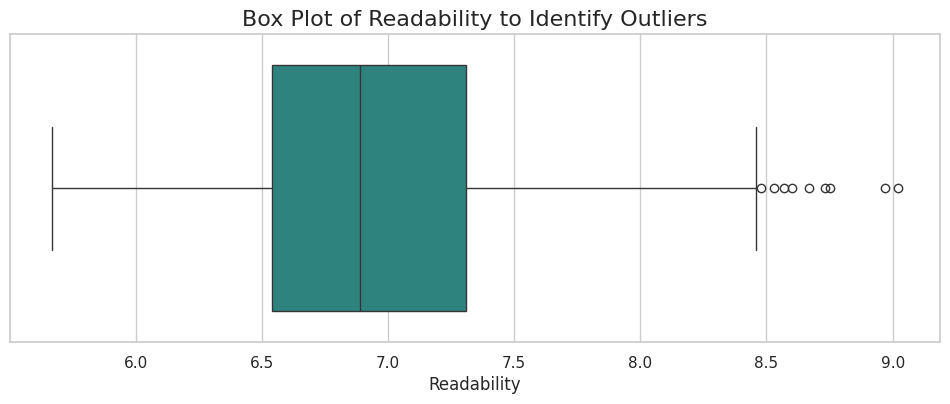


Outlier Detection Report for 'Readability'
-------------------------------------------
The Interquartile Range (IQR) is: 0.77
Lower Bound (Outlier Threshold): 5.39
Upper Bound (Outlier Threshold): 8.46

Found 9 outliers in the 'Readability' column:
                  Name  Readability
702    Sanford Biggers         9.02
22     Alice Rawsthorn         8.97
85         Ben Cameron         8.75
216       David Sengeh         8.73
130      Carolyn Porco         8.67
499  Marcin Jakubowski         8.60
783         Tal Danino         8.57
558            Mundano         8.53
82        Bassam Tariq         8.48




/tmp/ipython-input-3929409262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


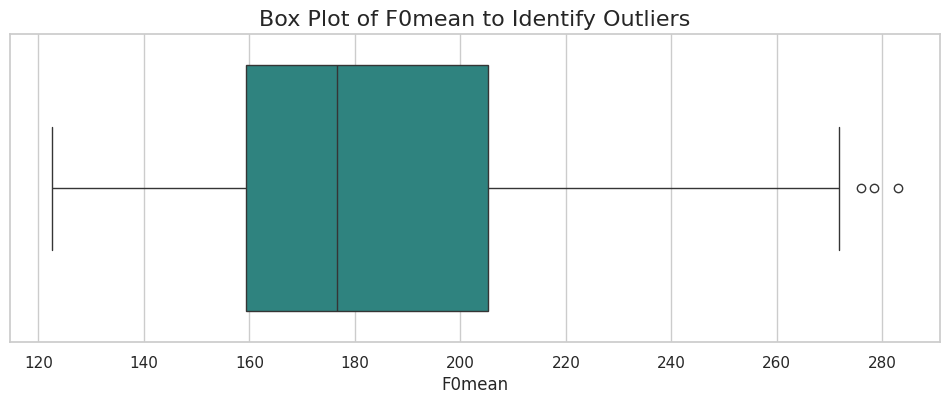


Outlier Detection Report for 'F0mean'
--------------------------------------
The Interquartile Range (IQR) is: 45.95
Lower Bound (Outlier Threshold): 90.39
Upper Bound (Outlier Threshold): 274.18

Found 3 outliers in the 'F0mean' column:
                 Name  F0mean
770  Sunitha Krishnan  282.93
78      Barbara Block  278.35
52         Ann Cooper  276.00




/tmp/ipython-input-3929409262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


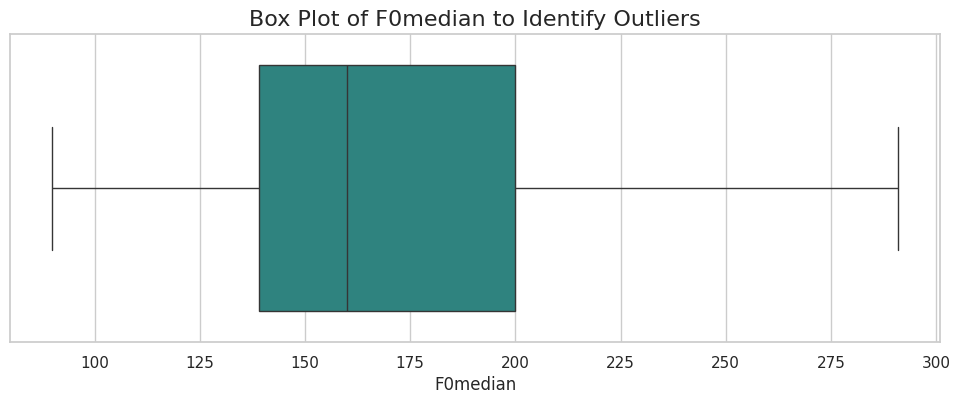


Outlier Detection Report for 'F0median'
----------------------------------------
The Interquartile Range (IQR) is: 60.87
Lower Bound (Outlier Threshold): 47.82
Upper Bound (Outlier Threshold): 291.31

Found 0 outliers in the 'F0median' column:
No outliers were found based on the 1.5 * IQR rule.




/tmp/ipython-input-3929409262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


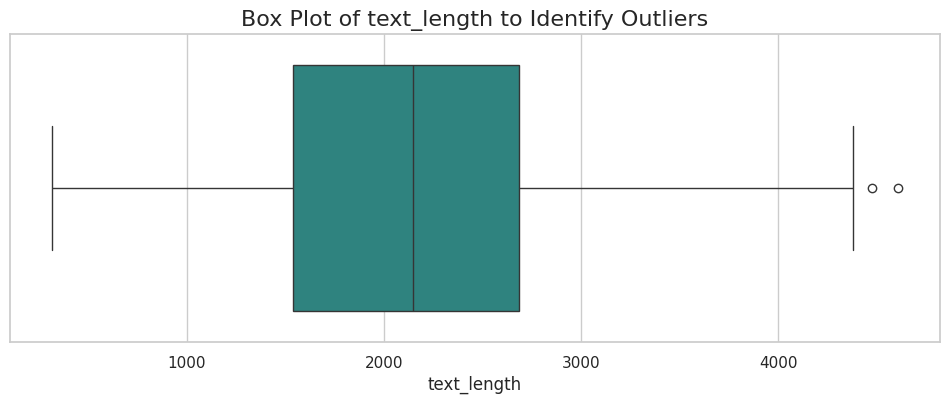


Outlier Detection Report for 'text_length'
-------------------------------------------
The Interquartile Range (IQR) is: 1149.00
Lower Bound (Outlier Threshold): -185.75
Upper Bound (Outlier Threshold): 4410.25

Found 2 outliers in the 'text_length' column:
                         Name  text_length
147  Chimamanda Ngozi Adichie         4607
469                 Leana Wen         4474




In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

print(f"--- Starting Comprehensive Outlier Analysis for {len(numerical_cols)} Numerical Columns ---")

# --- Loop through each numerical column to find and visualize outliers ---
for col in numerical_cols:
    # --- 1. Visualize Outliers with a Box Plot for the current column ---
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[col], palette='viridis')
    plt.title(f'Box Plot of {col} to Identify Outliers', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.show()

    # --- 2. Programmatically Identify and Display the Outliers ---

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    # Anything 1.5 times the IQR below Q1 or above Q3 is an outlier.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to find all rows where the column value is outside the boundaries
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nOutlier Detection Report for '{col}'")
    print("--------------------------------" + "-" * len(col)) # Dynamic underline
    print(f"The Interquartile Range (IQR) is: {IQR:.2f}")
    print(f"Lower Bound (Outlier Threshold): {lower_bound:.2f}")
    print(f"Upper Bound (Outlier Threshold): {upper_bound:.2f}")
    print(f"\nFound {len(outliers)} outliers in the '{col}' column:")

    # Display the outlier data, sorted by the current column for clarity
    if not outliers.empty:
        # We display the speaker's name and the outlier value for context
        display_cols = ['Name', col]
        print(outliers[display_cols].sort_values(by=col, ascending=False))
    else:
        print("No outliers were found based on the 1.5 * IQR rule.")

    print("\n" + "="*50 + "\n") # Separator for the next column's report



🧍 Gender Distribution:
Gender
M    548
F    298
Name: count, dtype: int64 

🌍 Language Distribution:
Language
US        478
Non-US    216
L2        152
Name: count, dtype: int64 

🎨 Race Distribution:
Race
White     651
Asian     104
Black      77
Latino     14
Name: count, dtype: int64 



/tmp/ipython-input-2916596372.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel', ax=axes[0])
/tmp/ipython-input-2916596372.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Language', palette='muted', ax=axes[1])
/tmp/ipython-input-2916596372.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Race', palette='deep', ax=axes[2])


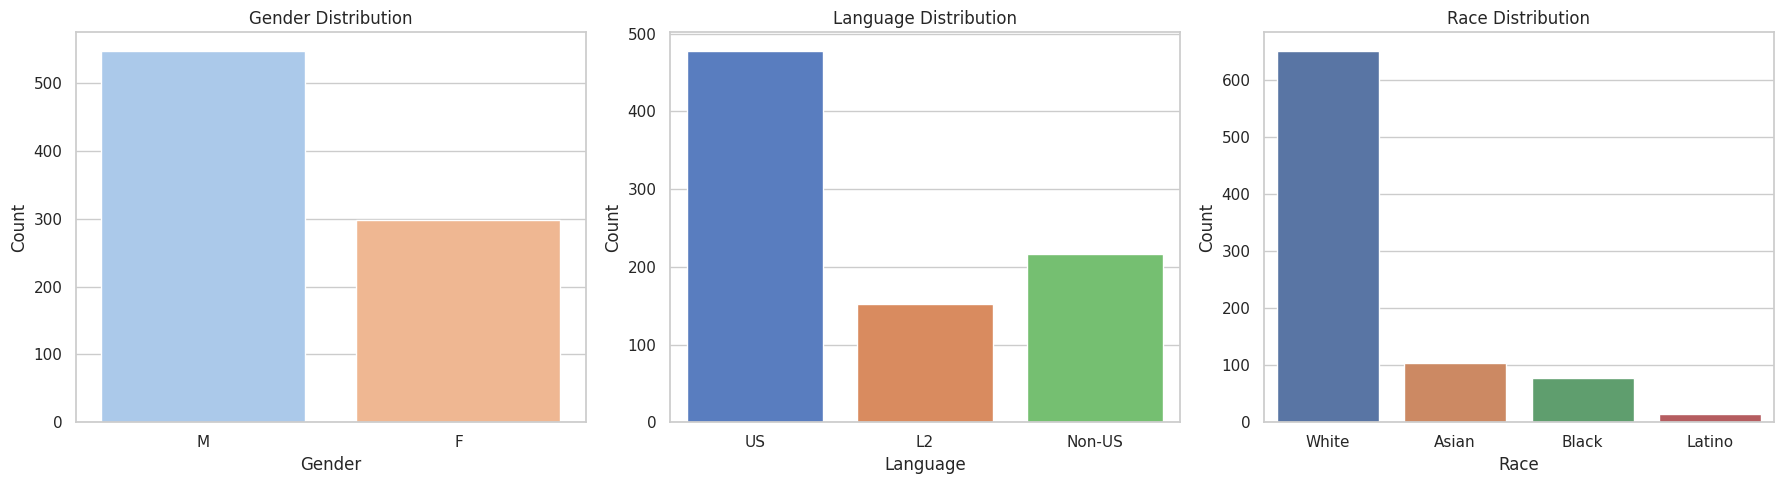

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 1️⃣ Distribution Counts
# =========================
print("🧍 Gender Distribution:")
print(df['Gender'].value_counts(), '\n')

print("🌍 Language Distribution:")
print(df['Language'].value_counts(), '\n')

print("🎨 Race Distribution:")
print(df['Race'].value_counts(), '\n')

# Optional: If 'Platform' column exists (e.g., YouTube, TED, etc.)
if 'Platform' in df.columns:
    print("💻 Platform Distribution:")
    print(df['Platform'].value_counts(), '\n')

# =========================
# 2️⃣ Visualization
# =========================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x='Gender', palette='pastel', ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Language', palette='muted', ax=axes[1])
axes[1].set_title('Language Distribution')
axes[1].set_xlabel('Language')
axes[1].set_ylabel('Count')

sns.countplot(data=df, x='Race', palette='deep', ax=axes[2])
axes[2].set_title('Race Distribution')
axes[2].set_xlabel('Race')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

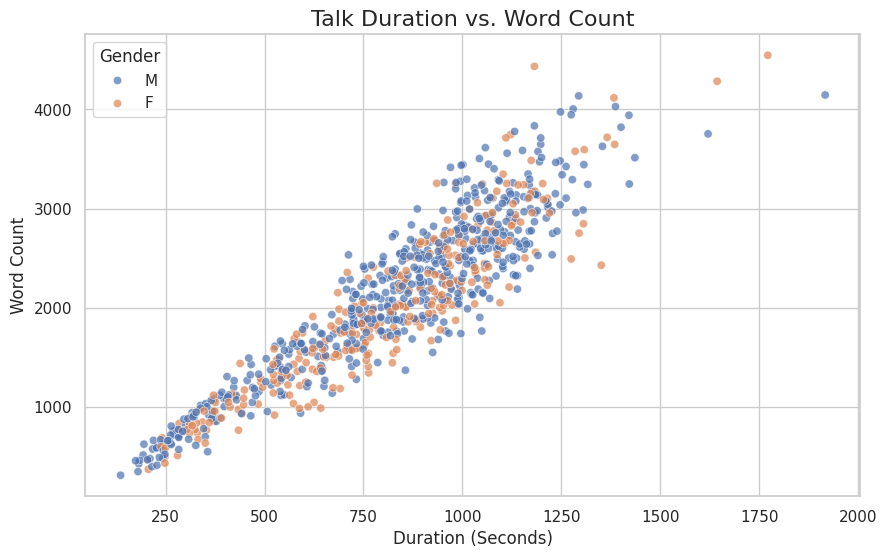

In [48]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Seconds', y='Words', data=df, hue='Gender', alpha=0.7)
plt.title('Talk Duration vs. Word Count', fontsize=16)
plt.xlabel('Duration (Seconds)', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.legend(title='Gender')
plt.show()

## CLEANING DATASET

In [49]:
# Select important columns based on correlation insights
# (Using the correct names we found)
selected_columns = [
    'Name','File', 'transcript', 'text_length',      # basic identifiers + text
    'Age', 'Gender', 'Race', 'Language',      # demographic & categorical
    'WPS', 'Readability', 'F0mean'           # core numerical features
]

# Create the subset dataframe
# (This assumes 'merged_df' is your source DataFrame)
clean_df = df[selected_columns].copy()

# Display summary
print("✅ Cleaned dataset created successfully!")
print("Shape:", clean_df.shape)
print("\nColumns:", list(clean_df.columns))
print("\nMissing values:\n", clean_df.isnull().sum())

✅ Cleaned dataset created successfully!
Shape: (846, 11)

Columns: ['Name', 'File', 'transcript', 'text_length', 'Age', 'Gender', 'Race', 'Language', 'WPS', 'Readability', 'F0mean']

Missing values:
 Name             0
File             0
transcript       0
text_length      0
Age            239
Gender           0
Race             0
Language         0
WPS              0
Readability      0
F0mean           0
dtype: int64


## DATA VISUALIZATION

--- Part 4: Outlier and Distribution Analysis ---

--- Outlier Detection (using 1.5 * IQR) ---
Column 'Age': 8 outliers found (out of 846)
Column 'text_length': 2 outliers found (out of 846)
Column 'WPS': 5 outliers found (out of 846)
Column 'Readability': 9 outliers found (out of 846)
Column 'F0mean': 3 outliers found (out of 846)

Plotting numerical box plots...


/tmp/ipython-input-1330052292.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=clean_df[col], palette='pastel')
/tmp/ipython-input-1330052292.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=clean_df[col], palette='pastel')
/tmp/ipython-input-1330052292.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=clean_df[col], palette='pastel')
/tmp/ipython-input-1330052292.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fa

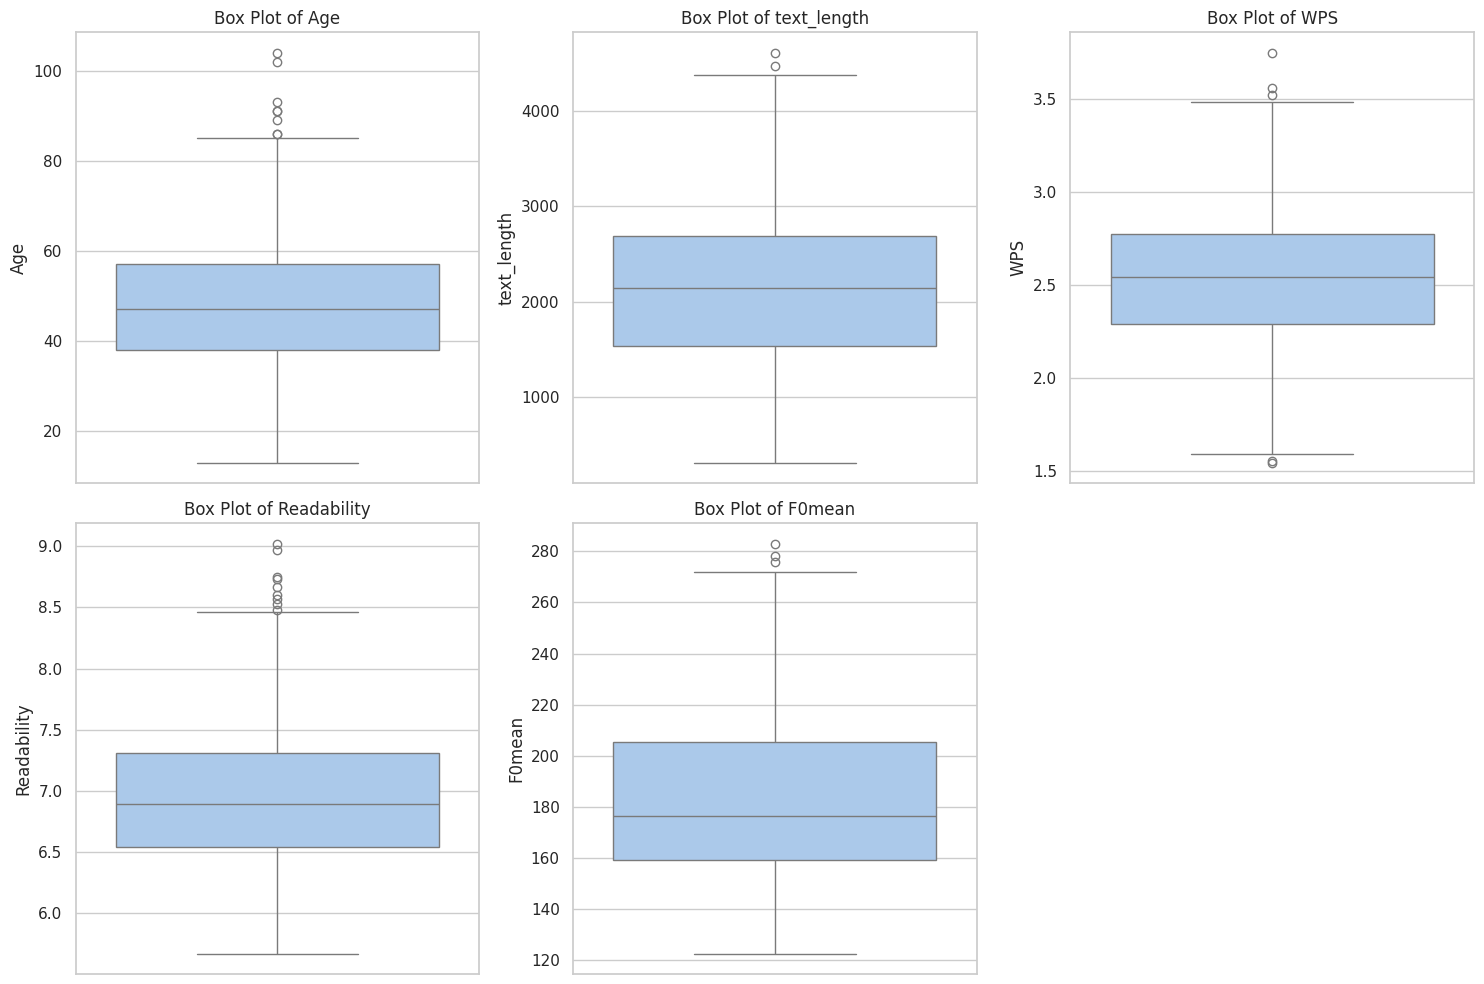


Plotting numerical features by Gender...


/tmp/ipython-input-1330052292.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=col, data=clean_df, palette='Set2')
/tmp/ipython-input-1330052292.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=col, data=clean_df, palette='Set2')
/tmp/ipython-input-1330052292.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=col, data=clean_df, palette='Set2')


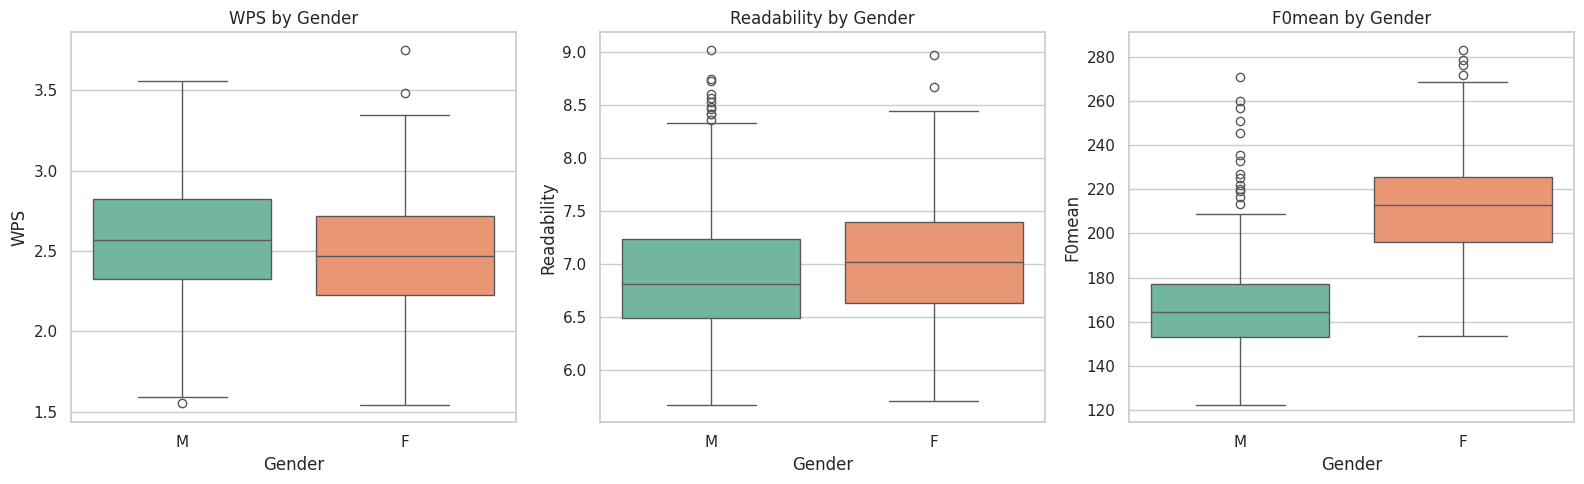


Plotting categorical bar charts...


/tmp/ipython-input-1330052292.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=clean_df[col], order=clean_df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-1330052292.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=clean_df[col], order=clean_df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-1330052292.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=clean_df[col], order=clean_df[col].value_counts().index, palette='viridis')


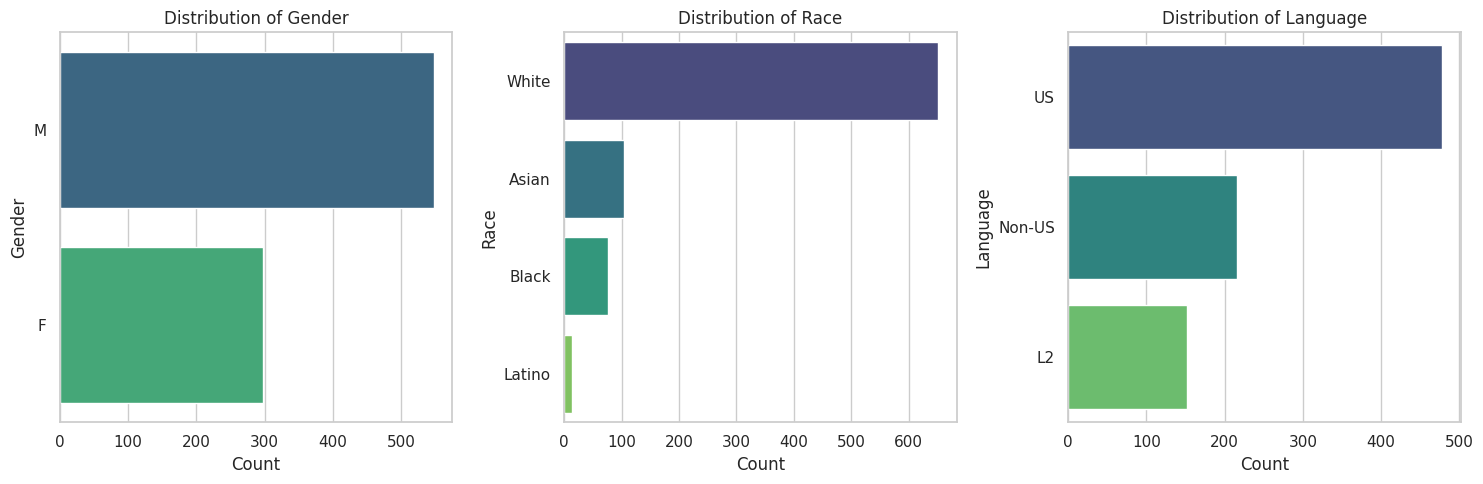


Plotting numerical histograms...


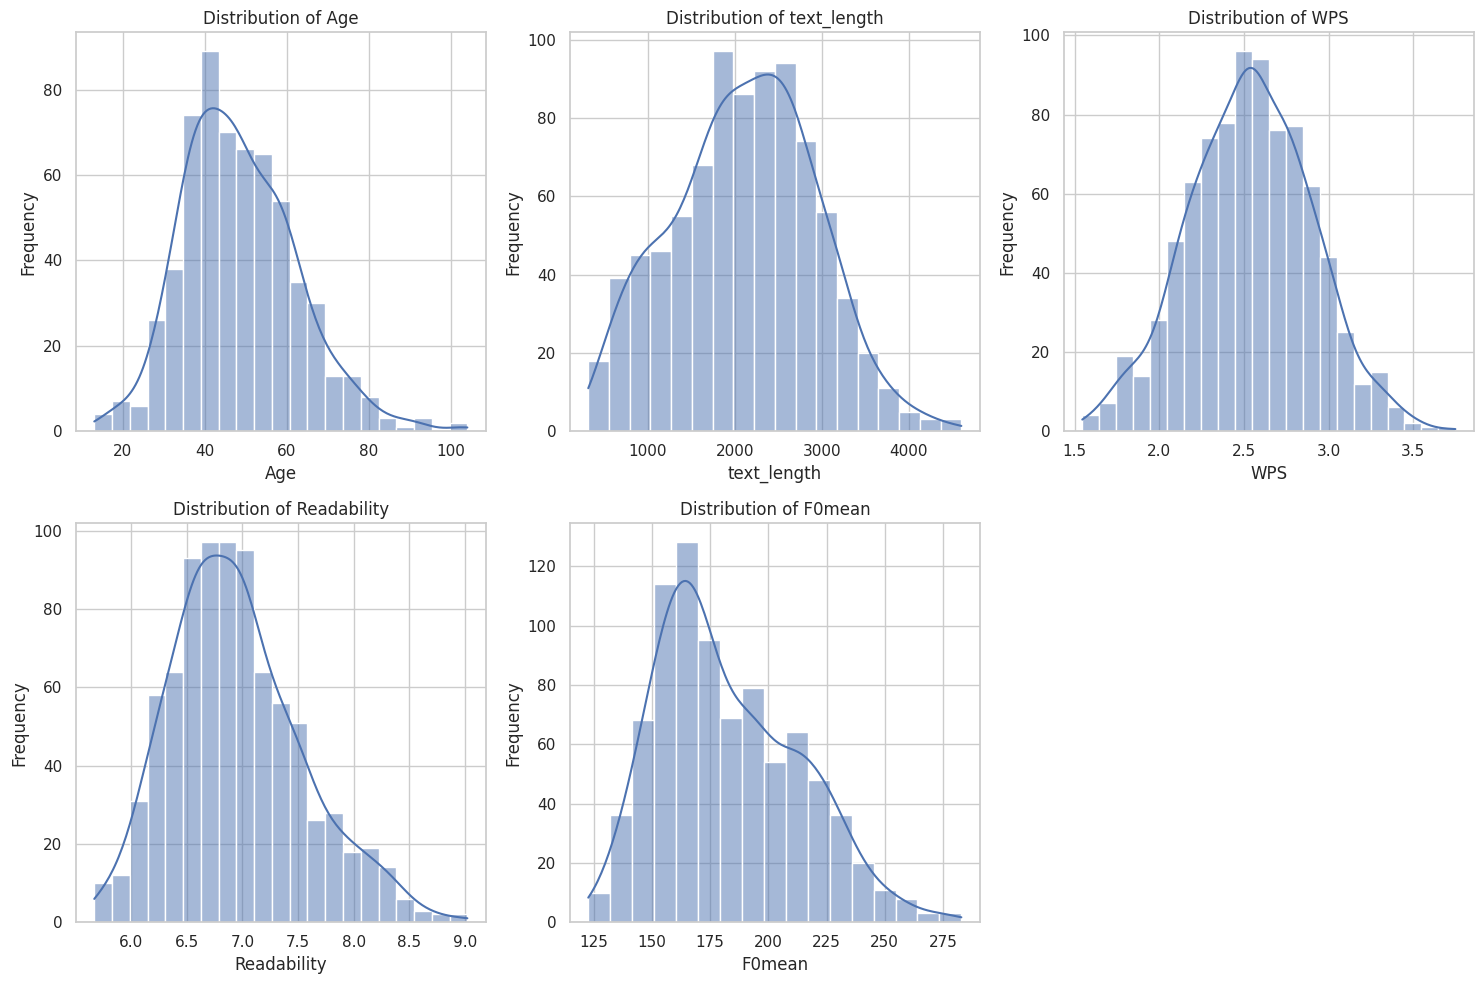


Plotting correlation heatmap for selected features...


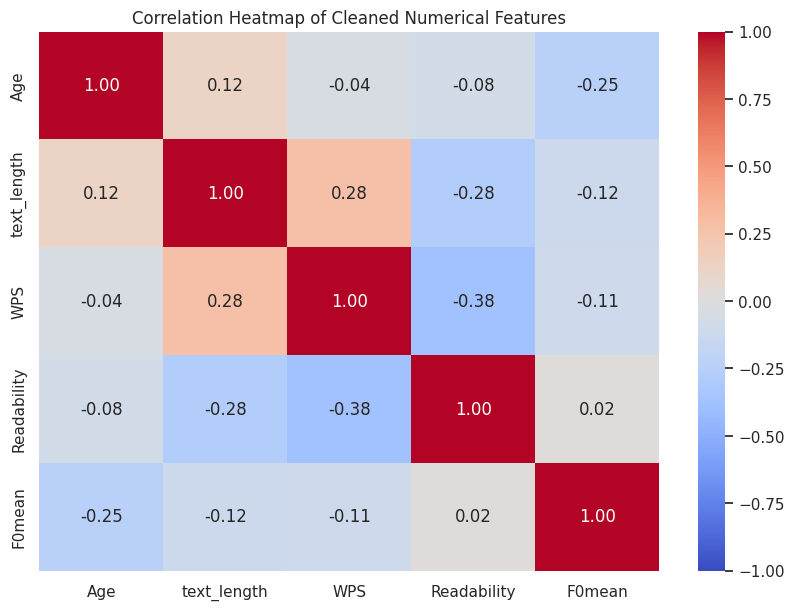

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# This script assumes a DataFrame named 'clean_df' already exists
# and has been loaded and cleaned in a previous step.

# Check if clean_df exists
if 'clean_df' in locals() or 'clean_df' in globals():
    print("--- Part 4: Outlier and Distribution Analysis ---")

    # Define numerical and categorical columns for analysis
    # This filters based on the columns that are actually in clean_df
    numerical_cols = [col for col in ['Age', 'text_length', 'WPS', 'Readability', 'F0mean'] if col in clean_df.columns]
    categorical_cols = [col for col in ['Gender', 'Race', 'Language'] if col in clean_df.columns]

    # --- 1. Outlier Detection (IQR Method) ---
    print("\n--- Outlier Detection (using 1.5 * IQR) ---")
    if not numerical_cols:
        print("No numerical columns found to analyze for outliers.")
    else:
        for col in numerical_cols:
            if clean_df[col].dtype in ['float64', 'int64']:
                Q1 = clean_df[col].quantile(0.25)
                Q3 = clean_df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                outliers = clean_df[(clean_df[col] < lower_bound) | (clean_df[col] > upper_bound)]
                print(f"Column '{col}': {len(outliers)} outliers found (out of {len(clean_df)})")
            else:
                print(f"Skipping outlier check for '{col}': not a numeric type.")

    # --- 2. Plot Box Plots for Numerical Data ---
    print("\nPlotting numerical box plots...")
    if not numerical_cols:
        print("No numerical columns found to plot box plots.")
    else:
        plt.figure(figsize=(15, 10))
        # Calculate grid size: 2 or 3 columns
        num_plots = len(numerical_cols)
        cols_grid = 3 if num_plots > 2 else 2
        rows_grid = (num_plots + cols_grid - 1) // cols_grid

        for i, col in enumerate(numerical_cols):
            plt.subplot(rows_grid, cols_grid, i + 1)
            sns.boxplot(y=clean_df[col], palette='pastel')
            plt.title(f'Box Plot of {col}')
            plt.ylabel(col)
        plt.tight_layout()
        plt.show() # This will display the plot in Colab

    # --- 3. Box Plots by Gender ---
    print("\nPlotting numerical features by Gender...")
    # Check if the required columns exist
    gender_num_cols = [col for col in ['WPS', 'Readability', 'F0mean'] if col in clean_df.columns]
    if 'Gender' in clean_df.columns and gender_num_cols:
        plt.figure(figsize=(16, 5)) # Changed size to 1x3 grid

        # Loop through only the available columns
        for i, col in enumerate(gender_num_cols, 1):
            plt.subplot(1, len(gender_num_cols), i) # Create a 1xN grid

            # --- THIS IS THE FIX ---
            # Use clean_df, not df
            sns.boxplot(x='Gender', y=col, data=clean_df, palette='Set2')
            # --- END OF FIX ---

            plt.title(f"{col} by Gender")

        plt.tight_layout()
        plt.show()
    else:
        print("Skipping 'by Gender' plots: 'Gender' column or numerical columns not found in clean_df.")


    # --- 4. Plot Bar Charts for Categorical Data ---
    print("\nPlotting categorical bar charts...")
    if not categorical_cols:
        print("No categorical columns found to plot bar charts.")
    else:
        plt.figure(figsize=(15, 5))
        # Calculate grid size: 3 columns
        num_plots = len(categorical_cols)
        cols_grid = 3
        rows_grid = (num_plots + cols_grid - 1) // cols_grid

        for i, col in enumerate(categorical_cols):
            plt.subplot(rows_grid, cols_grid, i + 1)
            sns.countplot(y=clean_df[col], order=clean_df[col].value_counts().index, palette='viridis')
            plt.title(f'Distribution of {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
        plt.tight_layout()
        plt.show() # This will display the plot in Colab

    # --- 5. Plot Histograms for Numerical Data ---
    print("\nPlotting numerical histograms...")
    if not numerical_cols:
        print("No numerical columns found to plot histograms.")
    else:
        plt.figure(figsize=(15, 10))
        # Calculate grid size: 2 or 3 columns
        num_plots = len(numerical_cols)
        cols_grid = 3 if num_plots > 2 else 2
        rows_grid = (num_plots + cols_grid - 1) // cols_grid

        for i, col in enumerate(numerical_cols):
            plt.subplot(rows_grid, cols_grid, i + 1)
            sns.histplot(clean_df[col], kde=True)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show() # This will display the plot in Colab

    # --- 6. Plot new Correlation Heatmap ---
    print("\nPlotting correlation heatmap for selected features...")
    if not numerical_cols:
        print("No numerical columns found to plot a heatmap.")
    else:
        plt.figure(figsize=(10, 7))
        correlation_matrix = clean_df[numerical_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Heatmap of Cleaned Numerical Features')
        plt.show() # This will display the plot in Colab

else:
    print("--- ERROR ---")
    print("DataFrame 'clean_df' not found.")
    print("Please make sure you have successfully run the previous code cells")
    print("to load and clean your data before running this plotting script.")



## TRANSCRIPTS CLEAN